# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#url ="http://api.openweathermap.org/data/2.5/weather?"
#url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
#url=f"https://api.openweathermap.org/data/2.5/weather?"
#url="http://api.openweathermap.org/data/2.5/weather?"
#print(requests.get(url))
#city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
#city_weather = requests.get(city_url).json()

#print(json.dumps(city_weather,indent=4, sort_keys=True))
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | de aar
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | big stone gap
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | north adams
Processing Record 10 of Set 1 | yurimaguas
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | baishishan
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | nizhniy kuranakh
Processing Record 16 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | stanley
Processing Record 21 of 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,de aar,-30.6497,24.0123,11.74,39,0,3.80,ZA,1696205407
1,adamstown,-25.0660,-130.1015,20.41,83,16,11.53,PN,1696205407
2,port-aux-francais,-49.3500,70.2167,5.35,87,100,18.93,TF,1696205407
3,big stone gap,36.8677,-82.7745,22.08,68,0,1.91,US,1696205408
4,longyearbyen,78.2186,15.6401,-2.09,59,75,9.77,SJ,1696205408


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,de aar,-30.6497,24.0123,11.74,39,0,3.80,ZA,1696205407
1,adamstown,-25.0660,-130.1015,20.41,83,16,11.53,PN,1696205407
2,port-aux-francais,-49.3500,70.2167,5.35,87,100,18.93,TF,1696205407
3,big stone gap,36.8677,-82.7745,22.08,68,0,1.91,US,1696205408
4,longyearbyen,78.2186,15.6401,-2.09,59,75,9.77,SJ,1696205408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

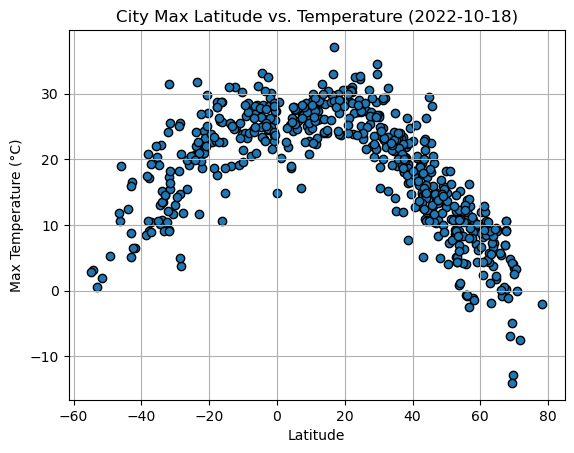

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

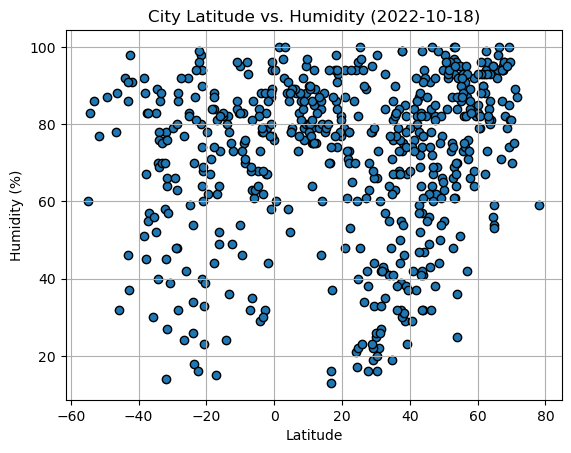

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

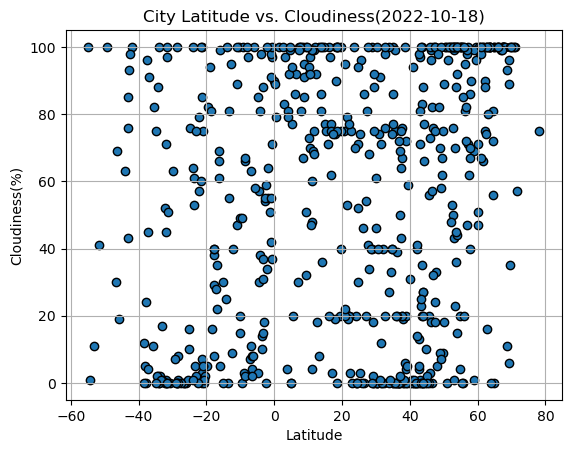

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

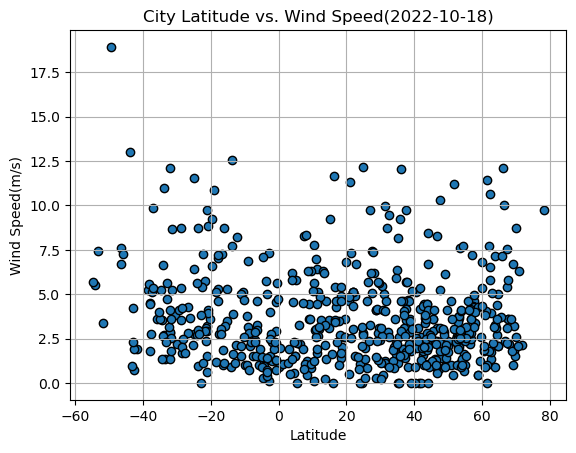

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    # Add labels and display R-squared value
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    r_squared = rvalue ** 2
   # plt.text(min(x_values), max(y_values) - 10,"f"R-squared = {round(r_squared, 2)}"fontsize=12)
    r_value_str = f"The r-value is: {round(rvalue, 2)}"
    plt.text(min(x_values), max(y_values) - 10, r_value_str, fontsize=12)

    # Show the plot
    plt.show()
    print("The r-value is: " +str(rvalue))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,big stone gap,36.8677,-82.7745,22.08,68,0,1.91,US,1696205408
4,longyearbyen,78.2186,15.6401,-2.09,59,75,9.77,SJ,1696205408
6,albany,42.6001,-73.9662,19.40,87,4,1.60,US,1696205408
7,ilulissat,69.2167,-51.1000,-4.99,74,6,1.03,GL,1696205408
8,north adams,42.7009,-73.1087,19.39,78,0,2.24,US,1696205274


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,de aar,-30.6497,24.0123,11.74,39,0,3.80,ZA,1696205407
1,adamstown,-25.0660,-130.1015,20.41,83,16,11.53,PN,1696205407
2,port-aux-francais,-49.3500,70.2167,5.35,87,100,18.93,TF,1696205407
5,hermanus,-34.4187,19.2345,13.06,70,2,3.57,ZA,1696205408
9,yurimaguas,-5.9000,-76.0833,28.32,61,100,1.00,PE,1696205408


###  Temperature vs. Latitude Linear Regression Plot

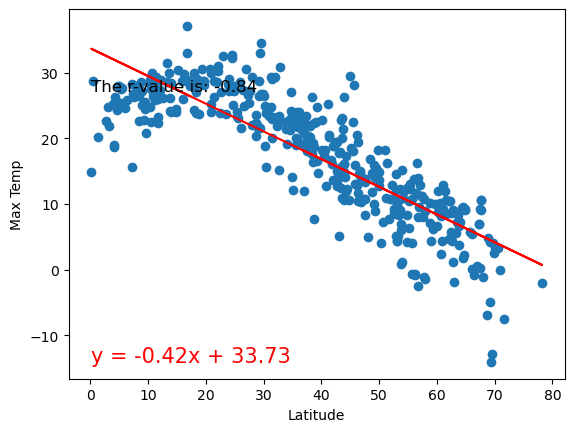

The r-value is: -0.8433047363270576


In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
#x_values=northern_hemi_df['Lat']
#y_values=northern_hemi_df['Max Temp']
#(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
#regress_values=x_values*slope+intercept
#line_eq="y="+str(round(slope,2))+"x + "+ str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,10),fontsize=15,color="red")
#plt.xlabel("Latitude")
#plt.ylabel("Max Temp")
#print(f"The r-squared is: {rvalue**2}")
#plt.show()
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"

linear_regression_plot(x_values, y_values, x_label, y_label)

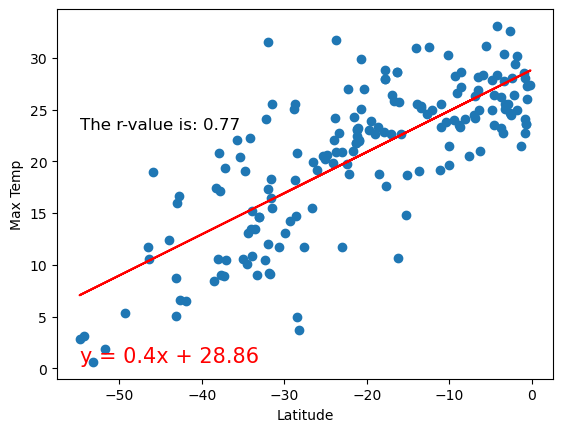

The r-value is: 0.7661526479937322


In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"

linear_regression_plot(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The above two graphs demonstrates the relationship between temperature and latitude in northern and southern hemisphere. In northern hemosphere as the latitude increase temperature decreases. This is proved by negative corelation of -0.80.
On the other hand there is a positive corelation with the decrease in latitide the tempertaure also decreases.

### Humidity vs. Latitude Linear Regression Plot

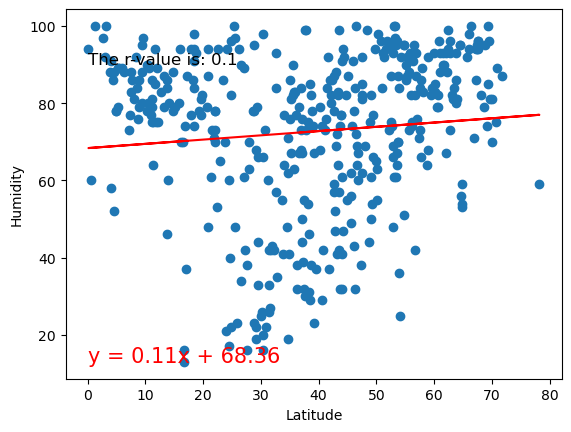

The r-value is: 0.09757932700770722


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
linear_regression_plot(x_values, y_values, x_label, y_label)

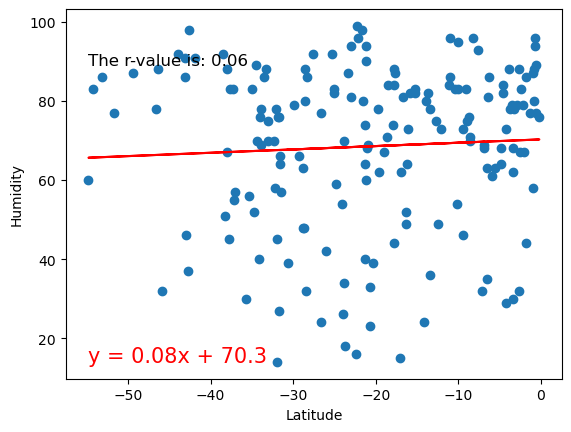

The r-value is: 0.05643950570262965


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"

linear_regression_plot(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

By looking at the graphs of Humidity and Latitude in Northern and Southern Hemisphere, it does not seems a strong corelation. It is seen that as latitide goes above 50 the humidity goes up to. The r value of 0.16 and 0.21 reflects a positive but weak relationship.

### Cloudiness vs. Latitude Linear Regression Plot

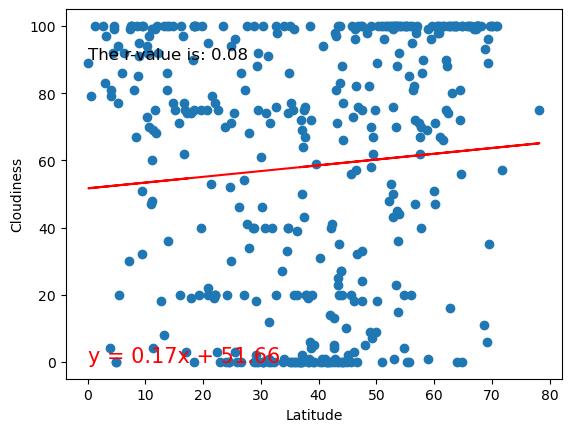

The r-value is: 0.08277311505722396


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
linear_regression_plot(x_values, y_values, x_label, y_label)

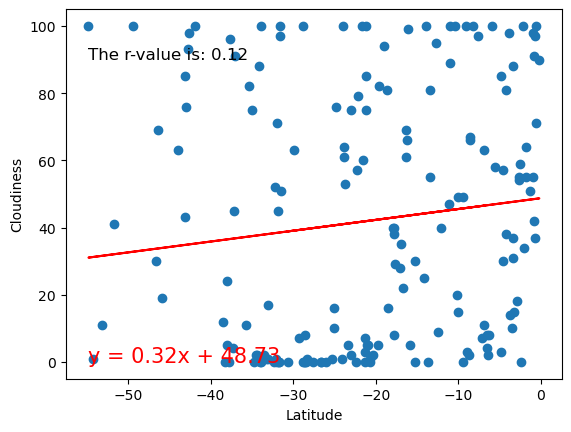

The r-value is: 0.11973541507543081


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"

linear_regression_plot(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The corelation between cloudiness and Latitude in northern hemisphere is is very weak as shown by r value of 0.05. In southern hemisphere the corelation with clouds and latitude is slighly more as shown with r value of 0.13.

### Wind Speed vs. Latitude Linear Regression Plot

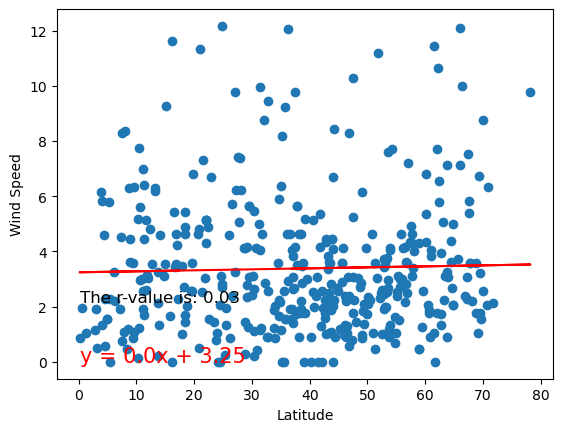

The r-value is: 0.027513153984018844


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
linear_regression_plot(x_values, y_values, x_label, y_label)

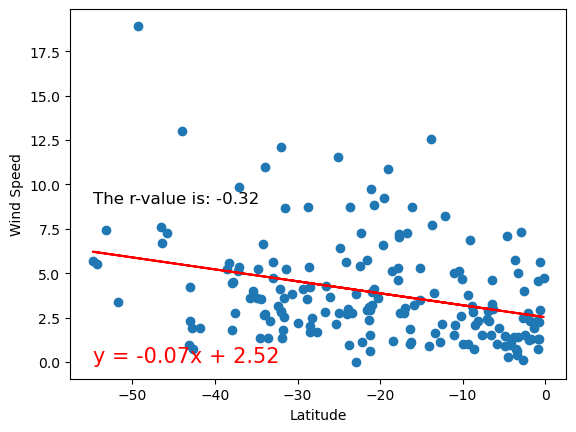

The r-value is: -0.3175345246948774


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
linear_regression_plot(x_values, y_values, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r value is-0.02 and -0.29 for northern and southern hemisphere respectively. This means there is a negative corelation between windspeed and latitude. For northern hemisphere all the dots are very scattered which mean the corelation is very weak.